In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns;
sns.set()

# String manipulation

In [2]:
%%HTML
<style>
code {
    font-weight: bold;
}
</style>
<h2>Regular Expression</h2>

In [3]:
%%HTML
<h3>Regex Object</h3>
<p style = 'color:teal;'>Create a Regex Object with <code>re.compile(pattern)</code> is highly recommended
if you intend to apply the same pattern to many strings.</p>

In [4]:
%%HTML
<code>swear.split(/\s+/g)</code>

In [5]:
import re
swear = 'Fuck   you Bitch     !'
#/[a-z]+/i ---> re.compile(r'[a-z]', flags = re.IGNORECASE)
pattern = re.compile('\s+')
pattern.split(swear)

['Fuck', 'you', 'Bitch', '!']

In [6]:
%%HTML
<code>swear.match(/\w+/g)</code>

In [7]:
re.findall('\w+', swear)
#equivalent: re.complie('\w+').findall(swear)

['Fuck', 'you', 'Bitch']

In [8]:
%%HTML
<code>swear.replace(/\s+/g, ' ')</code>

In [9]:
re.compile('\s+').sub(' ', swear)


'Fuck you Bitch !'

# Example: USA Food Database

In [10]:
import os 
os.chdir(r'C:\Users\dell\Books\pydata-book-2nd-edition\datasets')
os.getcwd()

'C:\\Users\\dell\\Books\\pydata-book-2nd-edition\\datasets'

In [11]:
import json
file = json.load(open('usda_food/database.json'))
len(file)

6636

In [12]:
df = pd.DataFrame(file)
df.head(3)

,description,group,id,manufacturer,nutrients,portions,tags
0,"Cheese, caraway",Dairy and Egg Products,1008,,"[{'value': 25.18, 'units': 'g', 'description':...","[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]",[]
1,"Cheese, cheddar",Dairy and Egg Products,1009,,"[{'value': 24.9, 'units': 'g', 'description': ...","[{'amount': 1, 'unit': 'cup, diced', 'grams': ...",[]
2,"Cheese, edam",Dairy and Egg Products,1018,,"[{'value': 4.22, 'units': 'g', 'description': ...","[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...",[]


In [13]:
%%HTML
<h3>Working with the first 4 columns</h3>

In [14]:
info = pd.DataFrame(file, columns = ['description', 'group', 'id', 'manufacturer'])
info.head(10)

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [15]:
#See the distribution of groups
df['group'].value_counts()

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs

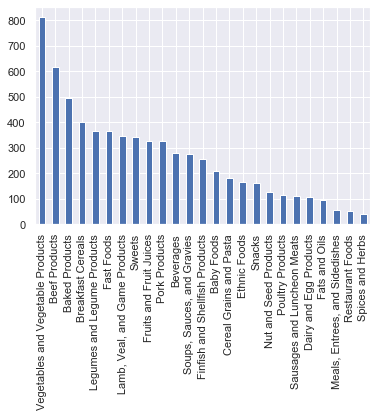

In [16]:
df['group'].value_counts().plot(kind = 'bar')

In [17]:
%%HTML
<h2>Analysis on all of the nutrient data</h2>

In [18]:
nutrients = [pd.DataFrame(food['nutrients']) for food in file]
nutrients = pd.concat(nutrients, ignore_index=True)
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389355 entries, 0 to 389354
Data columns (total 4 columns):
description    389355 non-null object
group          389355 non-null object
units          389355 non-null object
value          389355 non-null float64
dtypes: float64(1), object(3)
memory usage: 11.9+ MB


In [19]:
nutrients.head(10)

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00
7,"Fiber, total dietary",Composition,g,0.00
8,"Calcium, Ca",Elements,mg,673.00
9,"Iron, Fe",Elements,mg,0.64


In [20]:
%%HTML
<p>To avoid duplicate column names with DataFrame <code>info</code>, we will rename DataFrame <code>nutrients</code></p>

In [21]:
nutrients.rename(columns = {'description' : 'nutrient', 'group' : 'nutgroup'}, inplace = True)
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389355 entries, 0 to 389354
Data columns (total 4 columns):
nutrient    389355 non-null object
nutgroup    389355 non-null object
units       389355 non-null object
value       389355 non-null float64
dtypes: float64(1), object(3)
memory usage: 11.9+ MB


In [22]:
%%HTML
<h3>Mege 2 table into 1 table</h3>

In [23]:
data = pd.merge(info, nutrients, left_index = True, right_index = True, how = 'outer')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389355 entries, 0 to 389354
Data columns (total 8 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null float64
manufacturer    5195 non-null object
nutrient        389355 non-null object
nutgroup        389355 non-null object
units           389355 non-null object
value           389355 non-null float64
dtypes: float64(2), object(6)
memory usage: 26.7+ MB


In [24]:
data.head(3)

,description,group,id,manufacturer,nutrient,nutgroup,units,value
0,"Cheese, caraway",Dairy and Egg Products,1008.0,,Protein,Composition,g,25.18
1,"Cheese, cheddar",Dairy and Egg Products,1009.0,,Total lipid (fat),Composition,g,29.20
2,"Cheese, edam",Dairy and Egg Products,1018.0,,"Carbohydrate, by difference",Composition,g,3.06


In [25]:
data['nutrient'].unique()

array(['Protein', 'Total lipid (fat)', 'Carbohydrate, by difference',
       'Ash', 'Energy', 'Water', 'Fiber, total dietary', 'Calcium, Ca',
       'Iron, Fe', 'Magnesium, Mg', 'Phosphorus, P', 'Potassium, K',
       'Sodium, Na', 'Zinc, Zn', 'Copper, Cu', 'Manganese, Mn',
       'Selenium, Se', 'Vitamin A, IU', 'Retinol', 'Vitamin A, RAE',
       'Vitamin C, total ascorbic acid', 'Thiamin', 'Riboflavin',
       'Niacin', 'Pantothenic acid', 'Vitamin B-6', 'Folate, total',
       'Vitamin B-12', 'Folic acid', 'Folate, food', 'Folate, DFE',
       'Cholesterol', 'Fatty acids, total saturated',
       'Fatty acids, total monounsaturated',
       'Fatty acids, total polyunsaturated', 'Tryptophan', 'Threonine',
       'Isoleucine', 'Leucine', 'Lysine', 'Methionine', 'Cystine',
       'Phenylalanine', 'Tyrosine', 'Valine', 'Arginine', 'Histidine',
       'Alanine', 'Aspartic acid', 'Glutamic acid', 'Glycine', 'Proline',
       'Serine', 'Sucrose', 'Lactose', 'Maltose', 'Alcohol, ethyl',
  

In [26]:
#The median value for each group of (group, nutgroup)
median_value = data.groupby(['group', 'nutgroup'])['value'].median()
median_value

group                              nutgroup   
Baby Foods                         Amino Acids      1.0770
                                   Composition      5.8000
                                   Elements        13.9000
                                   Energy         988.0000
                                   Other            0.8300
                                   Sugars           0.2300
                                   Vitamins         0.3750
Baked Products                     Amino Acids      0.1830
                                   Composition      4.3750
                                   Elements         7.2000
                                   Energy         210.0000
                                   Other            0.0780
                                   Sugars           0.0100
                                   Vitamins         0.3360
Beef Products                      Amino Acids      0.2140
                                   Composition      5.0200
         

Text(0.5, 1.0, 'Vitamins')

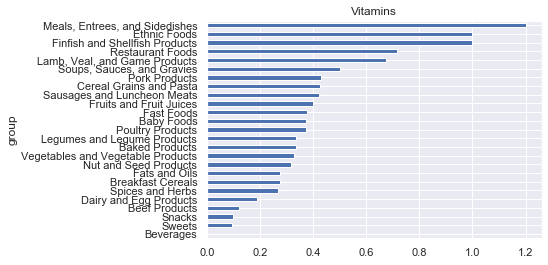

In [31]:
#See the distribution of Vitamins over different food group
median_value[:,'Vitamins'].sort_values().plot(kind = 'barh')
plt.title('Vitamins')